In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pokemon = pd.read_csv("pokemon.csv")
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### combining the type1 and type2 in a single column

In [13]:
pk_types = pokemon.melt(id_vars=['#', 'Name'],
                        value_vars=['Type 1', 'Type 2'],
                        var_name='type_level', 
                        value_name='type').dropna()
pk_types.head()

,#,Name,type_level,type
0,1,Bulbasaur,Type 1,Grass
1,2,Ivysaur,Type 1,Grass
2,3,Venusaur,Type 1,Grass
3,3,VenusaurMega Venusaur,Type 1,Grass
4,4,Charmander,Type 1,Fire


In [15]:
type_counts = pk_types['type'].value_counts()
type_order = type_counts.index

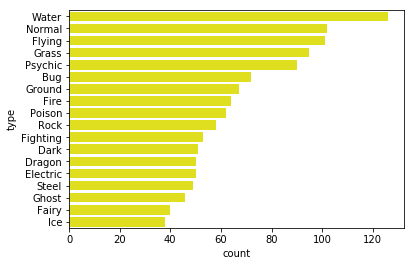

In [22]:
sns.countplot(data=pk_types, y='type', color='yellow', order=type_order);

this plot shows an absolute plot as it shows the exact number counts.

### to give bars, a relative percentage value

In [24]:
n_pokemon = pokemon.shape[0]          # denominator
max_type_count = type_counts[0]       # numerator
max_prop = max_type_count / n_pokemon
print(max_prop)

0.1575


In [35]:
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

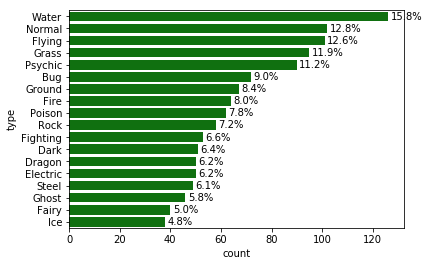

In [50]:
sns.countplot(data=pk_types, y='type', color='green', order=type_order);
for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    plt.text(count+1, i, pct_string, va='center');

### to xlabel with relative percentages

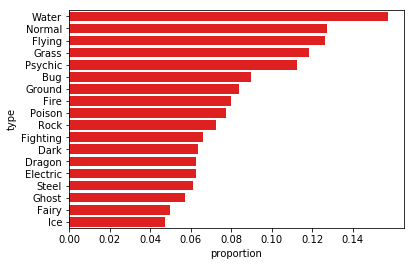

In [45]:
sns.countplot(data=pk_types, y='type', color='red', order=type_order);
plt.xticks(tick_props * n_pokemon, tick_names)    # relative frequency xticks
plt.xlabel('proportion');